In [1]:
from email_report import *
from models import find_chgpts
import matplotlib.pyplot as plt

In [2]:
# Generate random data
xs = [np.random.randn(np.random.randint(10, 20)) + mean for mean in [10, 14, 8, 11]]
x = np.concatenate(xs)
t = range(len(x))

alpha = 0.005

Text(0, 0.5, 'Values')

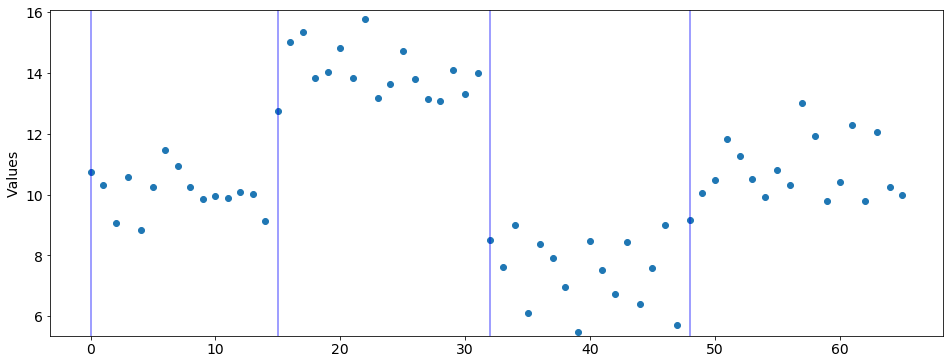

In [3]:
# Test changepoint detector
chgpts, detpts, votes = find_chgpts(x, alpha=alpha, num_test=5)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))

plt.scatter(np.arange(len(x)), x)
# plt.xlim(0, len(x))
plt.ylim(x.min()*.98,x.max()*1.02)
plt.vlines(chgpts, x.min()-1, x.max()+1, color='blue', alpha=.5)
plt.ylabel('Values')

0 pass, 10.74, 10.74, 0.00
1 pass, 10.31, 10.53, 0.22
2 pass, 9.07, 10.04, 0.71
3 pass, 10.59, 10.18, 0.66
4 pass, 8.82, 9.91, 0.80
5 pass, 10.26, 9.96, 0.74
6 pass, 11.46, 10.18, 0.86
7 pass, 10.94, 10.27, 0.85
8 pass, 10.25, 10.27, 0.80
9 pass, 9.86, 10.23, 0.77
10 pass, 9.94, 10.20, 0.74
11 pass, 9.89, 10.18, 0.71
12 pass, 10.09, 10.17, 0.68
13 pass, 10.01, 10.16, 0.66
14 pass, 9.13, 10.09, 0.69
15 pass, 12.74, 10.26, 0.93
16 warn, 15.01, 10.54, 1.43
17 fail, 15.35, 10.80, 1.78
18 pass, 13.82, 14.23, 1.03
19 pass, 14.03, 14.19, 0.92
20 pass, 14.82, 14.30, 0.88
21 pass, 13.83, 14.23, 0.83
22 pass, 15.76, 14.42, 0.93
23 pass, 13.17, 14.28, 0.96
24 pass, 13.63, 14.22, 0.93
25 pass, 14.72, 14.26, 0.90
26 pass, 13.81, 14.22, 0.87
27 pass, 13.15, 14.14, 0.88
28 pass, 13.09, 14.07, 0.89
29 pass, 14.11, 14.07, 0.86
30 pass, 13.29, 14.02, 0.86
31 pass, 14.00, 14.02, 0.83
32 pass, 8.50, 13.71, 1.50
33 pass, 7.60, 13.39, 2.00
34 pass, 9.00, 13.17, 2.17
35 pass, 6.11, 7.80, 1.10
36 pass, 8.37, 

(4.463887877258025, 16.762813148883332)

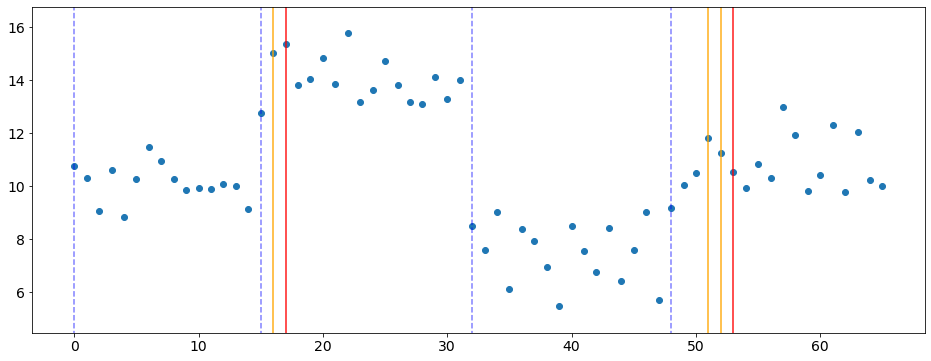

In [4]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))
for i in range(len(x)):
    output = changepoint_test(x[:i+1], alpha)
    if output[0] == 'warn':
        plt.vlines(i, -100, 100, color='orange', alpha=.9)
    if output[0] == 'fail':
        plt.vlines(i, -100, 100, color='red', alpha=.9)
    print(i, '%s, %.2f, %.2f, %.2f' % output)
    
plt.scatter(np.arange(len(x)), x)
plt.vlines(chgpts, -100, 100, color='blue', alpha=.5, linestyles='dashed')
plt.ylim(x.min()-1, x.max()+1)